In [3]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mif = pd.read_csv('MifaserClasPredictions_valid.csv')
mif.head()

,predictions,true,pred_names,true_names,score
0,63,63,2.6.1.16,2.6.1.16,0.977155
1,968,968,4.1.1.37,4.1.1.37,0.999933
2,102,102,1.7.99.4,1.7.99.4,0.750559
3,1245,1245,2.5.1.19,2.5.1.19,0.991086
4,505,505,2.7.2.1,2.7.2.1,0.964598


In [5]:
mif['predicted_1'] = [x.split('.')[0] for x in mif['pred_names']]
mif['true_1'] = [x.split('.')[0] for x in mif['true_names']]

In [6]:
mif['predicted_2'] = ['.'.join(x.split('.')[0:2]) for x in mif['pred_names']]
mif['true_2'] = ['.'.join(x.split('.')[0:2]) for x in mif['true_names']]

In [7]:
mif['predicted_3'] = ['.'.join(x.split('.')[0:3]) for x in mif['pred_names']]
mif['true_3'] = ['.'.join(x.split('.')[0:3]) for x in mif['true_names']]

In [8]:
mif.head()

,predictions,true,pred_names,true_names,score,predicted_1,true_1,predicted_2,true_2,predicted_3,true_3
0,63,63,2.6.1.16,2.6.1.16,0.977155,2,2,2.6,2.6,2.6.1,2.6.1
1,968,968,4.1.1.37,4.1.1.37,0.999933,4,4,4.1,4.1,4.1.1,4.1.1
2,102,102,1.7.99.4,1.7.99.4,0.750559,1,1,1.7,1.7,1.7.99,1.7.99
3,1245,1245,2.5.1.19,2.5.1.19,0.991086,2,2,2.5,2.5,2.5.1,2.5.1
4,505,505,2.7.2.1,2.7.2.1,0.964598,2,2,2.7,2.7,2.7.2,2.7.2


In [9]:
print('accuracy to 4th EC number:')
print(np.sum(mif['pred_names']==mif['true_names'])/len(mif))

print('accuracy to 3rd EC number:')
print(np.sum(mif['predicted_3']==mif['true_3'])/len(mif))

print('accuracy to 2nd EC number:')
print(np.sum(mif['predicted_2']==mif['true_2'])/len(mif))

print('accuracy to 1st EC number:')
print(np.sum(mif['predicted_1']==mif['true_1'])/len(mif))

accuracy to 4th EC number:
0.8146780707444914
accuracy to 3rd EC number:
0.8377811551948599
accuracy to 2nd EC number:
0.843896710146191
accuracy to 1st EC number:
0.8711307681054267


# confusion matrix by diff EC places

In [10]:
def plot_confusion_matrix(confusion_matrix, class_names, figsize = (15,6), 
                          ticksize=12, fontsize=12, titlesize=16, annot=True, save=False, fname=''):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap.  Zeroes are
    colored white.  Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white.  Get more decicmals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix. 
    class_names: list
        List of class names in the order they index the confusion matrix.
    figsize: tuple
        A pair tuple.  The first value is figure width.  The second
        value is figure height. Defaults to (15,6).
    fontsize: int
        Font size for axes labels. Defaults to 16.
    """        
    #Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace = 0.5)
    
    # ax1 - Normalized Confusion Matrix    
    #Normalize by dividing (M X M) matrix by (M X 1) matrix.  (M X 1) is row totals.
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:,np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)  #fix any nans caused by zero row total
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    heatmap = sns.heatmap(df_cm_norm, ax=ax1, cmap='Blues', fmt='.1%', annot=annot)
    
    ax1.tick_params(axis='x', labelrotation=50, labelsize=ticksize, labelcolor='black')
    ax1.tick_params(axis='y', labelrotation=0, labelsize=ticksize, labelcolor='black')
    ax1.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix messed up ylim
    ax1.set_xlabel('PREDICTED CLASS', fontsize=titlesize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=titlesize, color='black')
    ax1.set_title('Normalized Confusion Matrix', pad=15, fontsize=titlesize, color='black')
    cbar = ax1.collections[0].colorbar
    cbar.ax.tick_params(labelsize=fontsize)
    
    # ax2 - Normalized Confusion Matrix with errors_only shown 
    np.fill_diagonal(conf_matrix_norm, 0) 
    df_errors = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    heatmap = sns.heatmap(df_errors, ax=ax2, cmap='Blues', fmt='.1%', annot=annot)
    
    ax2.tick_params(axis='x', labelrotation=60, labelsize=ticksize, labelcolor='black')
    ax2.tick_params(axis='y', labelrotation=0, labelsize=ticksize, labelcolor='black')
    ax2.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix bug in matplotlib 3.1.1.  Or, use earlier matplotlib.
    ax2.set_xlabel('PREDICTED CLASS', fontsize=titlesize, color='black')
    ax2.set_ylabel('TRUE CLASS', fontsize=titlesize, color='black')
    ax2.set_title('Normalized Confusion Matrix - Errors Only', pad=15, fontsize=titlesize, color='black')   
    cbar2 = ax2.collections[0].colorbar
    cbar2.ax.tick_params(labelsize=fontsize)
  
    for text in ax1.texts:
        if text.get_text() == '0.000':
            text.set_color(color='white')            
    for text in ax2.texts:
        if text.get_text() == '0':
            text.set_color(color='white')
            
    if save:
        print('saving to',fname)
        fig.savefig(fname,dpi=400)

saving to EC1_confusionmatrix.png


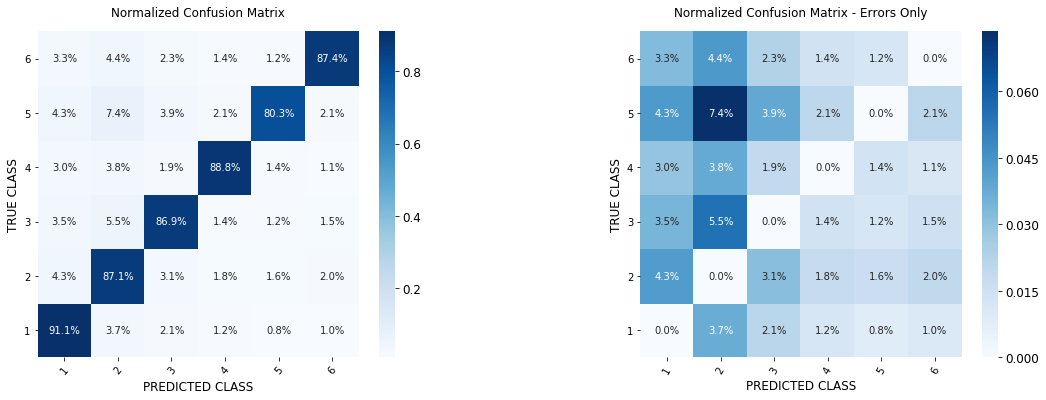

In [36]:
labels_ec1 = sorted(list(set(mif['true_1'].astype(str))))
cf_ec1 = confusion_matrix(mif['true_1'].astype(str), mif['predicted_1'].astype(str), labels=labels_ec1)
plot_confusion_matrix(cf_ec1, class_names=labels_ec1, figsize = (18,6), fontsize=12, ticksize=10, titlesize=12,
                     save=True,fname='EC1_confusionmatrix.png')

saving to EC2_confusionmatrix.png


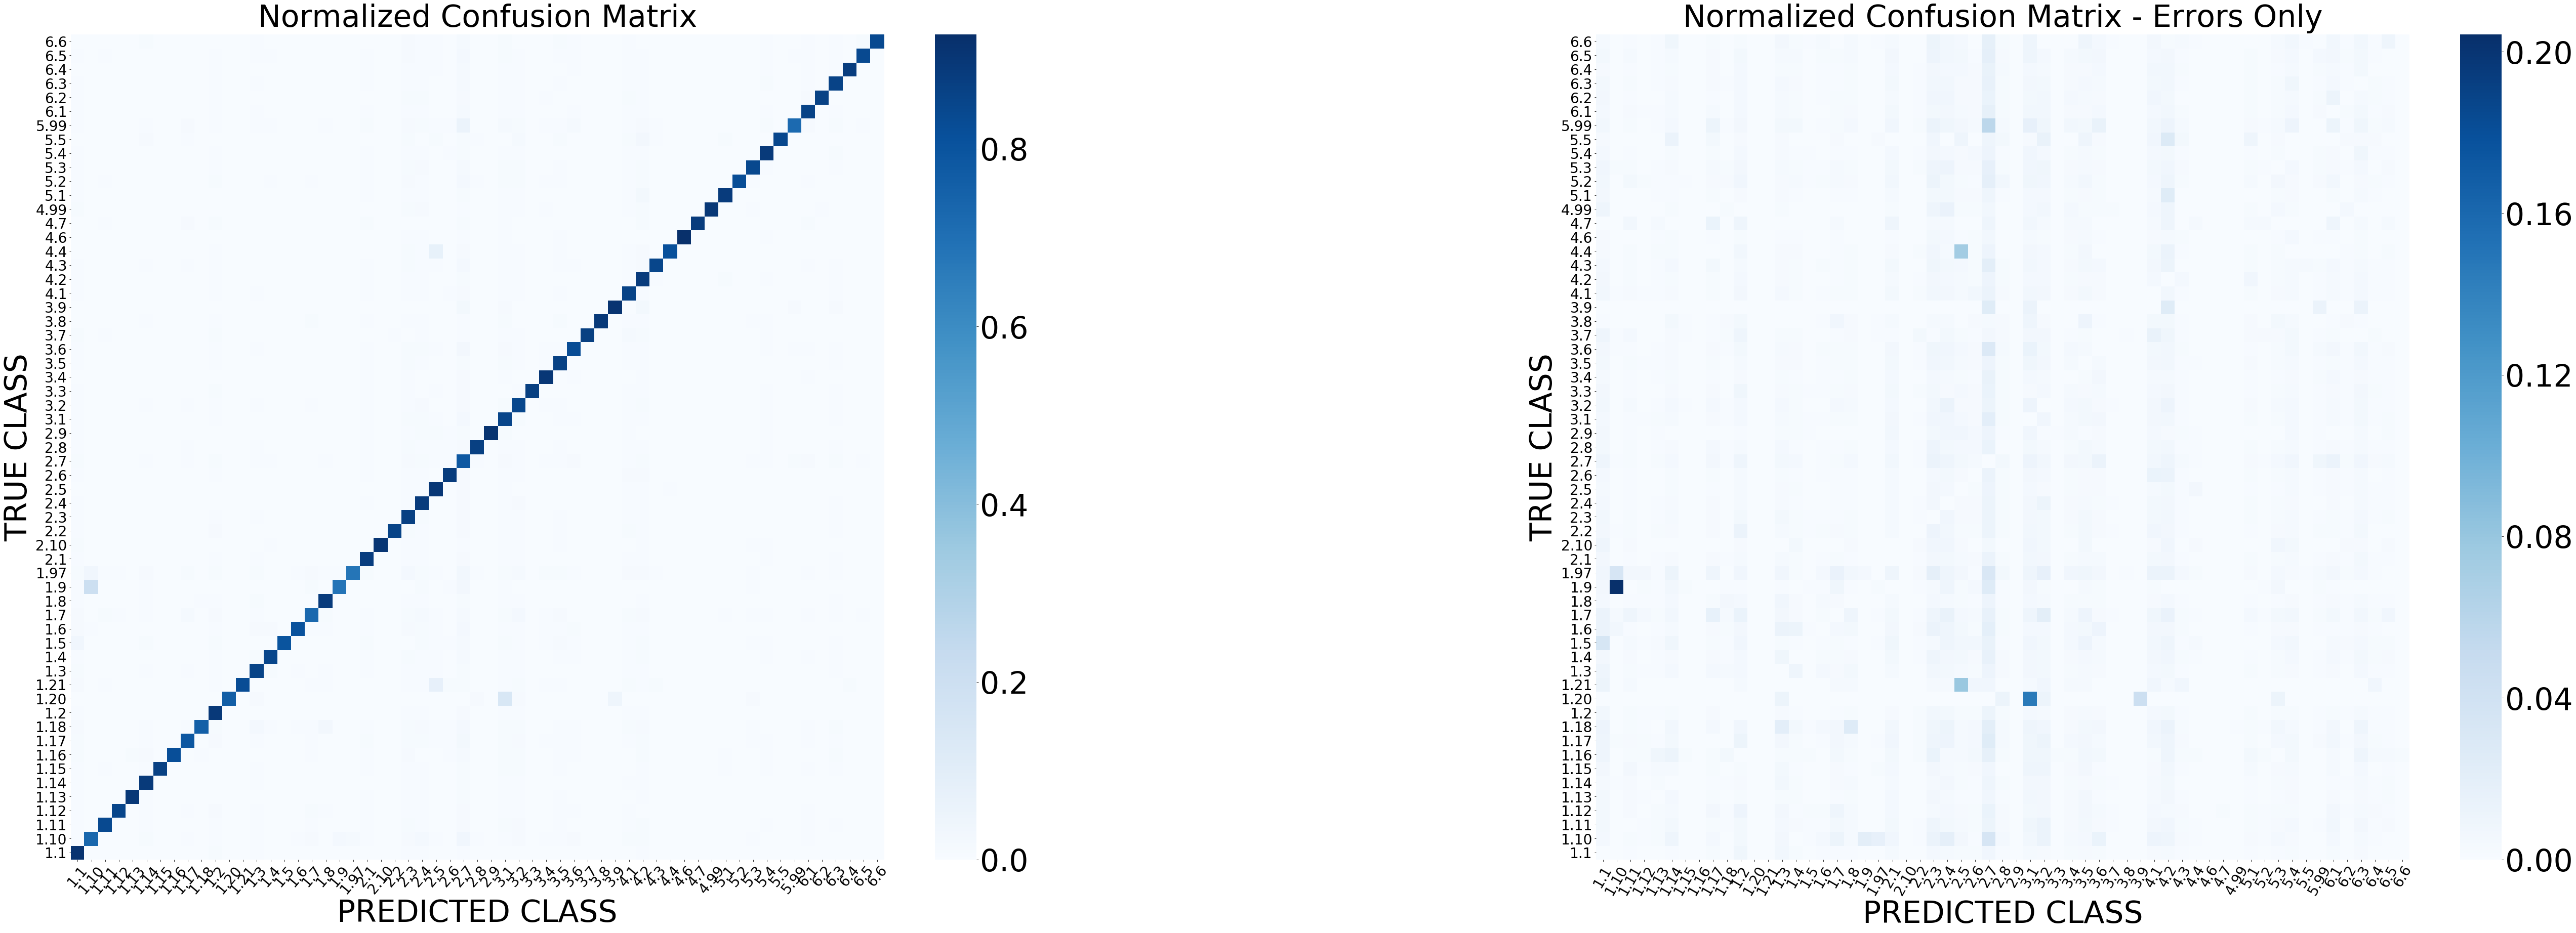

In [41]:
labels_ec2 = sorted(list(set(mif['true_2'].astype(str))))
cf_ec2 = confusion_matrix(mif['true_2'].astype(str), mif['predicted_2'].astype(str), labels=labels_ec2)
plot_confusion_matrix(cf_ec2, class_names=labels_ec2, errors_only=False, 
                      figsize = (90,30), ticksize=28, fontsize=60, titlesize=60, annot=False,
                     save=True,fname='EC2_confusionmatrix.png')

saving to EC3_confusionmatrix.png


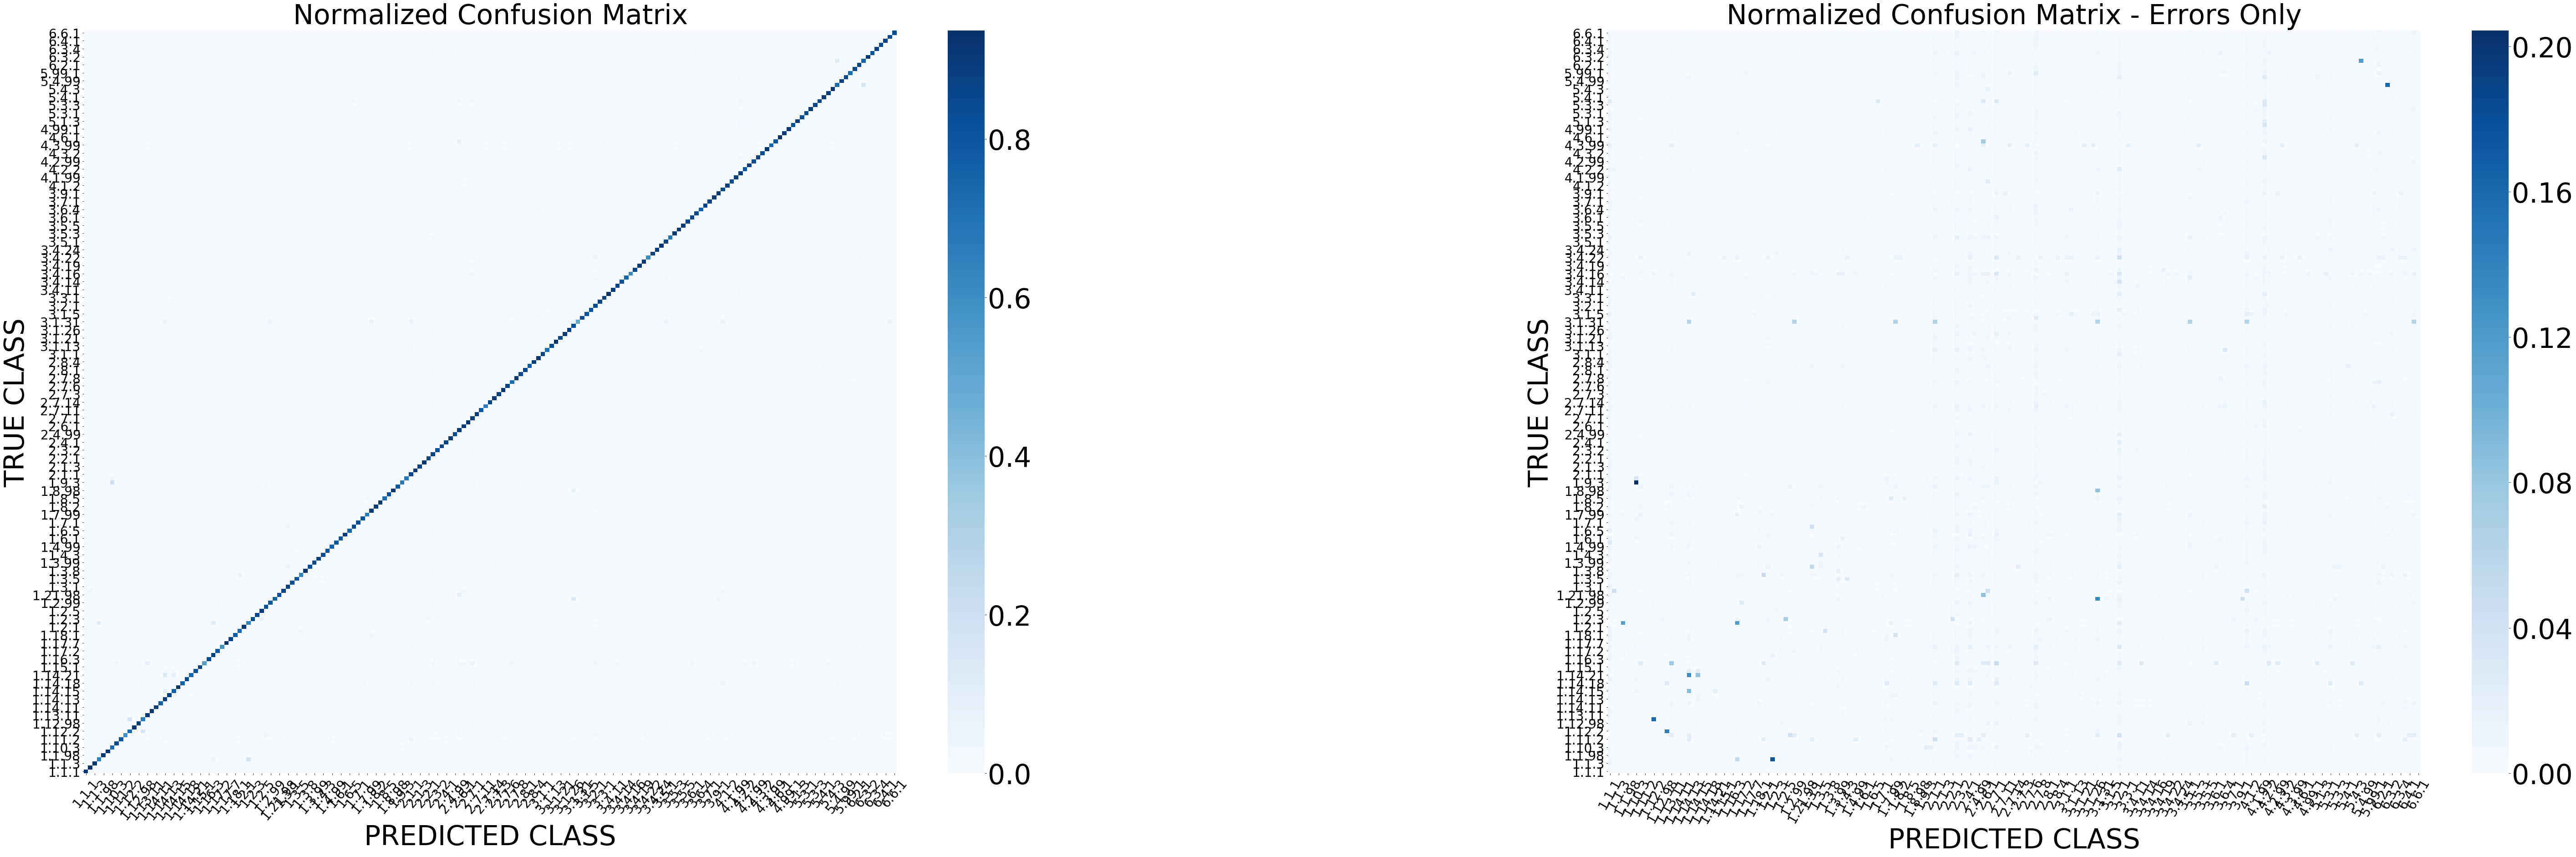

In [42]:
labels_ec3 = sorted(list(set(mif['true_3'].astype(str))))
cf_ec3 = confusion_matrix(mif['true_3'].astype(str), mif['predicted_3'].astype(str), labels=labels_ec3)
plot_confusion_matrix(cf_ec3, class_names=labels_ec3, errors_only=False, 
                      figsize = (100,30), fontsize=60, titlesize=60, ticksize=28, annot=False,
                     save=True, fname='EC3_confusionmatrix.png')

In [11]:
labels_ec4 = sorted(list(set(mif['true_names'].astype(str))))
cf_ec4 = confusion_matrix(mif['true_names'].astype(str), mif['pred_names'].astype(str), labels=labels_ec4)
plot_confusion_matrix(cf_ec4, class_names=labels_ec4, errors_only=False, 
                      figsize = (100,30), fontsize=96, titlesize=144, ticksize=36, annot=False,
                     save=True, fname='EC4_confusionmatrix.png')

TypeError: plot_confusion_matrix() got an unexpected keyword argument 'errors_only'